# **Face Detection using Haar Cascades**

Haar Cascades is a key component of the Viola-Jonesobject detection framework. <br>
A simple rectangular Haar-like feature can be defined as the sum of pixels of areas inside the rectangle which can be at any position and scale within the original image. This modified feature set is called 2-rectangle feature. <br><br>
Viola and Jones also defined 3-rectangle features and 4-rectangle features.
The values indicate certain characteristics of a particular area of the image. Each feature type can indicate the existence (or absence) of certain characteristics in the image, such as edges or changes in texture. For example, a 2-rectangle feature can indicate where the border lies between a dark region and a light region.

In [3]:
import cv2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
nadia=cv2.imread("../DATA/Nadia_Murad.jpg",0)
denis=cv2.imread("../DATA/Denis_Mukwege.jpg",0)
solvay=cv2.imread("../DATA/solvay_conference.jpg",0)

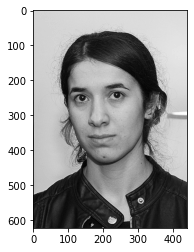

In [6]:
plt.imshow(nadia, cmap="gray")

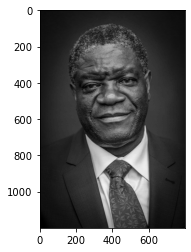

In [7]:
plt.imshow(denis, cmap="gray")

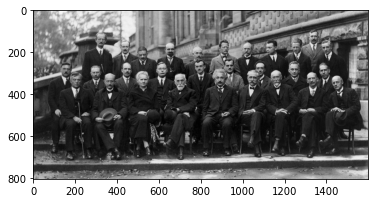

In [8]:
plt.imshow(solvay, cmap="gray")

In [71]:
face_cascade=cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_frontalface_default.xml")

In [88]:
def detect_face(img):
    
    face_img=img.copy()
    
    face_rect=face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0),4)
        
    return face_img

In [89]:
result=detect_face(denis)

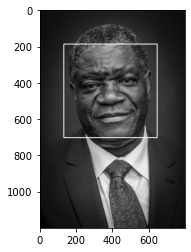

In [90]:
plt.imshow(result, cmap="gray")

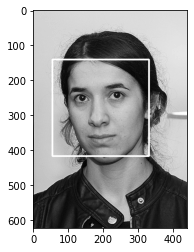

In [91]:
plt.imshow(detect_face(nadia), cmap="gray")

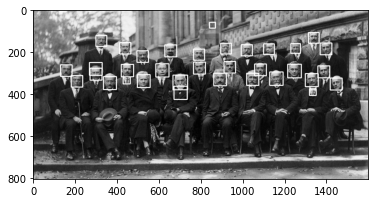

In [92]:
plt.imshow(detect_face(solvay), cmap="gray")

In [93]:
def adj_detect_face(img):
    
    face_img=img.copy()
    
    face_rect=face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 6)
        
    return face_img

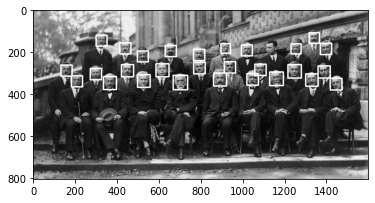

In [94]:
plt.imshow(adj_detect_face(solvay), cmap="gray")

In [95]:
eye_cascade=cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_eye.xml")

In [96]:
def detect_eye(img):
    
    face_img=img.copy()
    
    eye_rects=eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=10)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 4)
    
    return face_img

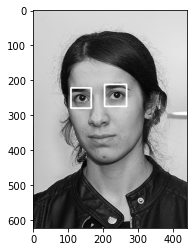

In [97]:
result=detect_eye(nadia)
plt.imshow(result, cmap="gray")

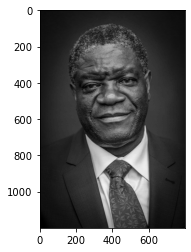

In [98]:
plt.imshow(detect_eye(denis), cmap="gray")
#no eyes will be detected
#the image is too edited

In [100]:
cap=cv2.VideoCapture(0)

while True:
    
    ret, frame=cap.read(0)
    
    frame=detect_face(frame)
    frame=detect_eye(frame)
    
    cv2.imshow("Video Face Detection", frame)
    
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
        
cv2.destroyAllWindows()

In [101]:
mouth_cascade=cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_smile.xml")

In [107]:
def detect_mouth(img):
    
    face_img=img.copy()
    
    mouth_rects=mouth_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=1)
    
    for (x,y,w,h) in mouth_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 4)
    
    return face_img